In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

#import geopandas

from feature_extraction import person_finder, org_finder, state_agg

In [3]:
df = pd.read_csv('../data/pollster-ratings.csv')

df.head()

,Rank,Pollster,Pollster Rating ID,Polls Analyzed,AAPOR/Roper,Banned by 538,Predictive Plus-Minus,538 Grade,Mean-Reverted Bias,Races Called Correctly,...,Simple Average Error,Simple Expected Error,Simple Plus-Minus,Advanced Plus-Minus,Mean-Reverted Advanced Plus-Minus,# of Polls for Bias Analysis,Bias,House Effect,Average Distance from Polling Average (ADPA),Herding Penalty
0,1,The New York Times/Siena College,448,95,yes,no,-1.192860,A+,1.006012,0.747368,...,4.043250,5.364792,-1.318429,-1.625523,-1.318372,94,1.243260,0.700506,3.575558,0.261188
1,2,Selzer & Co.,304,53,yes,no,-1.175911,A+,0.161120,0.811321,...,4.916848,5.959235,-1.039274,-1.622671,-1.000844,35,0.297645,-0.343495,5.288403,0.000000
2,3,Research & Polling Inc.,280,44,no,no,-0.965392,A+,-0.582568,0.886364,...,4.177286,5.548050,-1.367651,-1.938115,-1.183301,43,-0.956078,0.632896,4.642076,0.286276
3,4,SurveyUSA,325,856,no,no,-0.917320,A+,0.003251,0.891355,...,4.681671,5.642531,-0.957747,-1.094410,-1.043528,697,0.003447,-0.526230,4.969035,0.126963
4,5,Marquette University Law School,195,15,yes,no,-0.908215,A/B,0.237527,0.800000,...,2.846556,5.938505,-3.088836,-3.191347,-1.208475,11,0.751227,-0.199840,4.201278,0.257600


In [4]:
df.columns

Index(['Rank', 'Pollster', 'Pollster Rating ID', 'Polls Analyzed',
       'AAPOR/Roper', 'Banned by 538', 'Predictive Plus-Minus', '538 Grade',
       'Mean-Reverted Bias', 'Races Called Correctly', 'Misses Outside MOE',
       'Simple Average Error', 'Simple Expected Error', 'Simple Plus-Minus',
       'Advanced Plus-Minus', 'Mean-Reverted Advanced Plus-Minus',
       '# of Polls for Bias Analysis', 'Bias', 'House Effect',
       'Average Distance from Polling Average (ADPA)', 'Herding Penalty'],
      dtype='object')

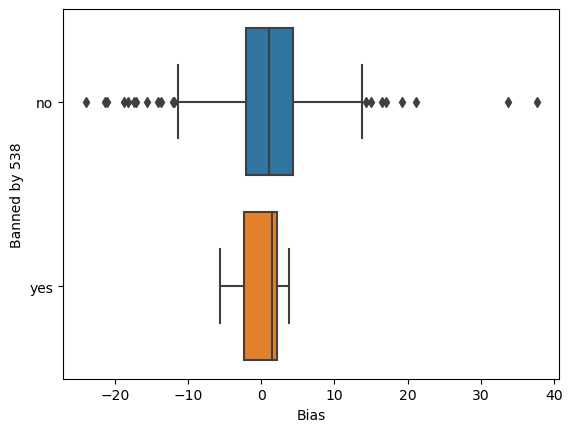

In [5]:
sns.boxplot(df, x = 'Bias', y = 'Banned by 538');

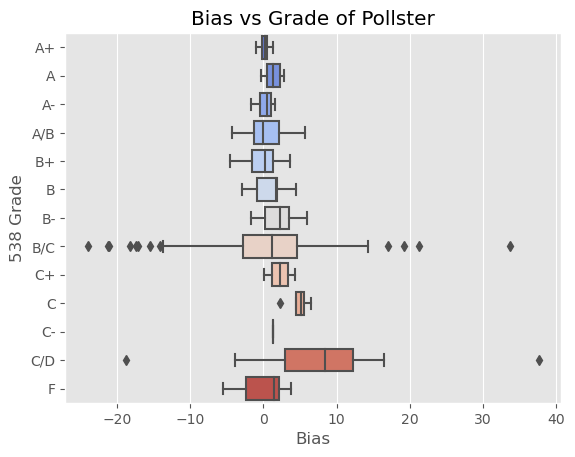

In [345]:
sns.boxplot(df, 
            x = 'Bias', 
            y = '538 Grade', 
            palette = 'coolwarm', 
            order = ['A+', 'A', 'A-', 'A/B', 'B+', 'B', 'B-', 'B/C', 'C+', 'C', 'C-', 'C/D', 'F'],
        )

plt.title('Bias vs Grade of Pollster');

In [7]:
df['538 Grade'].isna().sum()

0

In [8]:
df['538 Grade'].value_counts()[sorted(df['538 Grade'].unique())] # Vast majority are graded B/C

A        8
A+       4
A-       9
A/B     47
B       10
B+      11
B-       9
B/C    382
C        4
C+       2
C-       1
C/D     19
F       11
Name: 538 Grade, dtype: int64

In [9]:
df['Banned by 538'].value_counts() # barely any are banned

no     506
yes     11
Name: Banned by 538, dtype: int64

In [10]:
df['AAPOR/Roper'].value_counts()

no     438
yes     79
Name: AAPOR/Roper, dtype: int64

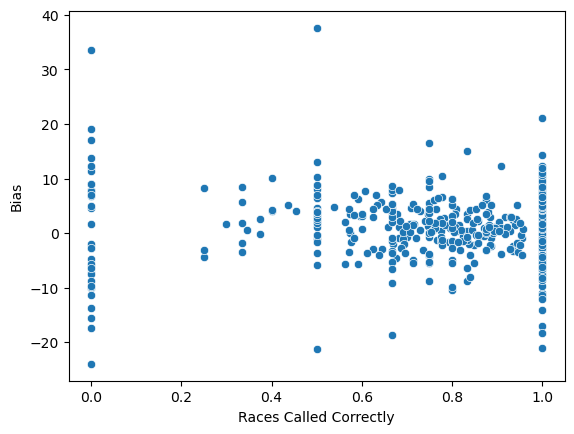

In [11]:
sns.scatterplot(
    data = df,
    x = 'Races Called Correctly',
    y = 'Bias'
);

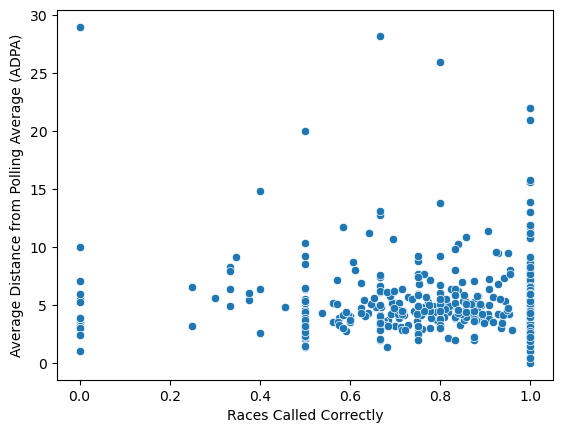

In [12]:
sns.scatterplot(
    data = df,
    x = 'Races Called Correctly',
    y = 'Average Distance from Polling Average (ADPA)'
);

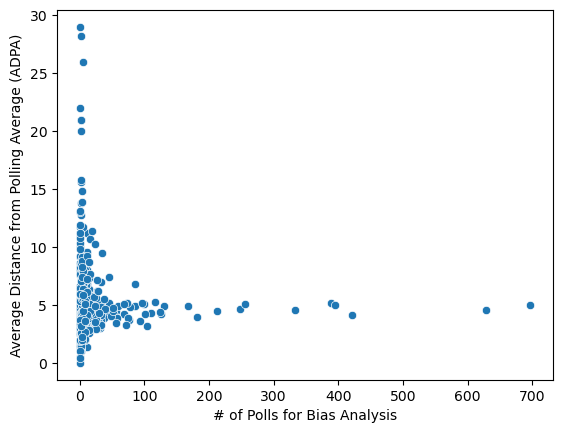

In [13]:
sns.scatterplot(
    data = df,
    x = '# of Polls for Bias Analysis',
    y = 'Average Distance from Polling Average (ADPA)'
);

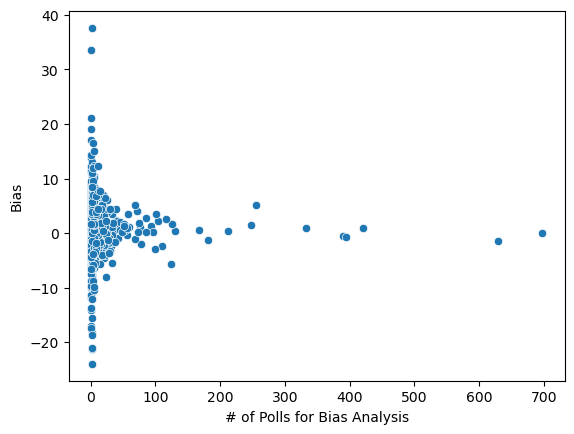

In [14]:
sns.scatterplot(
    data = df,
    x = '# of Polls for Bias Analysis',
    y = 'Bias'
);

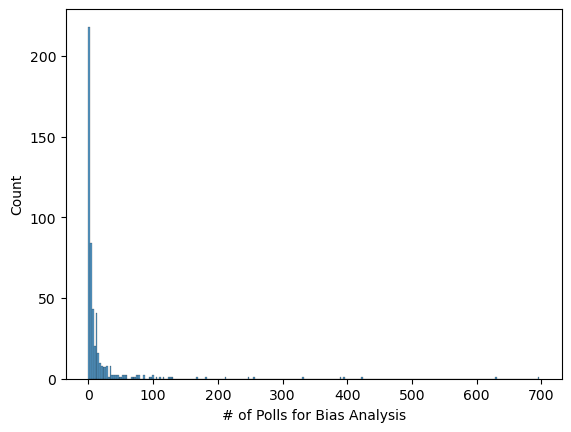

In [15]:
sns.histplot(
    data = df,
    x = '# of Polls for Bias Analysis'
);

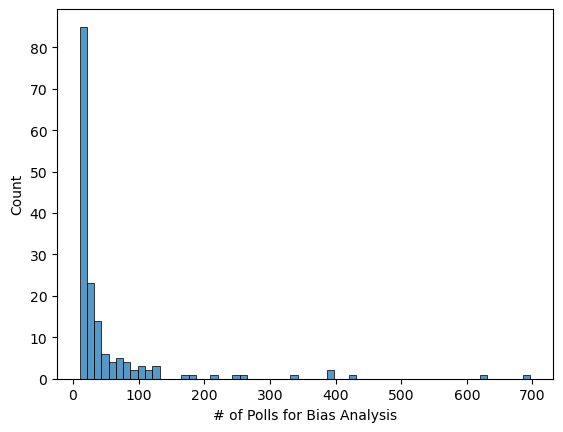

In [16]:
sns.histplot(
    data = df[df['# of Polls for Bias Analysis'] >= 10],
    x = '# of Polls for Bias Analysis'
);

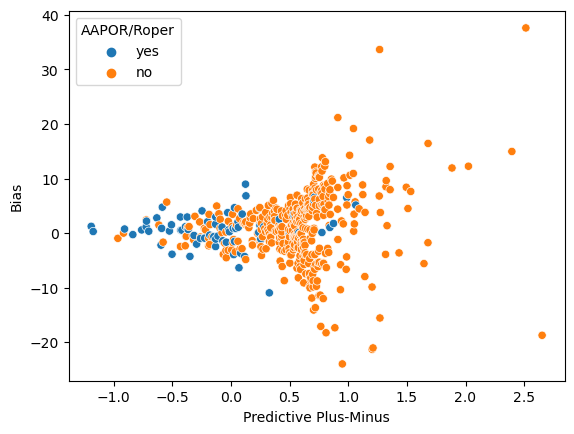

In [17]:
sns.scatterplot(
    data = df,
    x = 'Predictive Plus-Minus',
    y = 'Bias',
    hue = 'AAPOR/Roper'
);

In [18]:
df.groupby('AAPOR/Roper')['Races Called Correctly'].describe()

,count,mean,std,min,25%,50%,75%,max
AAPOR/Roper,,,,,,,,
no,438.0,0.764582,0.296165,0.0,0.666667,0.863701,1.000000,1.0
yes,79.0,0.791234,0.203867,0.0,0.724877,0.819820,0.940476,1.0


In [19]:
polls = pd.read_csv('../data/raw-polls.csv')

polls.head()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,...,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,advancedplusminus,comment
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,...,-31.0,11/3/1998,33.16,54.32,-21.15,9.85,-9.85,1.0,1.461561,for New York Daily News | WABC-TV (New York)
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,...,-15.0,11/3/1998,44.69,50.05,-5.36,9.64,-9.64,1.0,4.285789,NaN
2,26026,31266,1736,1998,1998_Sen-G_NV,NV,Sen-G,Sen-G,FM3 Research,91,...,5.0,11/3/1998,47.86,47.77,0.09,4.91,4.91,1.0,-1.023784,for unspecified Democratic sponsor
3,26013,31253,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Blum & Weprin Associates,32,...,-8.0,11/3/1998,54.62,44.08,10.54,18.54,-18.54,0.0,10.064104,for New York Daily News | WABC-TV (New York)
4,63632,117103,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Garin-Hart-Yang Research Group,113,...,4.0,11/3/1998,54.62,44.08,10.54,6.54,-6.54,1.0,-1.972391,for Charles E. Schumer


In [20]:
polls.shape

(10776, 33)

In [21]:
polls.isna().sum()

poll_id                  0
question_id              0
race_id                  0
year                     0
race                     0
location                 0
type_simple              0
type_detail              0
pollster                 0
pollster_rating_id       0
methodology              0
partisan              9957
polldate                 0
samplesize               0
cand1_name               0
cand1_id                 0
cand1_party              0
cand1_pct                0
cand2_name               0
cand2_id                 0
cand2_party              0
cand2_pct                0
cand3_pct             6879
margin_poll              0
electiondate             0
cand1_actual             0
cand2_actual             0
margin_actual            0
error                    0
bias                  1952
rightcall                0
advancedplusminus        0
comment               6711
dtype: int64

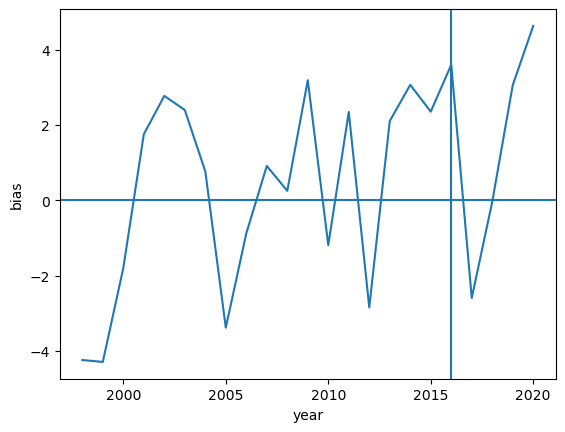

In [22]:
sns.lineplot(polls.groupby('year')['bias'].mean())
#sns.lineplot(polls.groupby('year')['margin_poll'].mean())
plt.axhline(y = 0)
plt.axvline(x = 2016);

In [23]:
polls.groupby(['year', 'type_simple'])['bias'].agg(['mean', 'count'])

mean  count
year type_simple                 
1998 Gov-G       -5.794870    115
     House-G     -1.175439     57
     Sen-G       -4.204706    102
1999 Gov-G       -4.292500      4
2000 Gov-G       -0.364419     43
...                    ...    ...
2020 Gov-G        7.233421     38
     House-G      6.372800    100
     Pres-G       4.077831    590
     Pres-P            NaN      0
     Sen-G        4.836454    282

[68 rows x 2 columns]

In [24]:
polls['type_simple'].value_counts()

Pres-G     2940
Sen-G      2651
Pres-P     1821
Gov-G      1712
House-G    1652
Name: type_simple, dtype: int64

In [25]:
polls['partisan'].value_counts()

D      451
R      367
IND      1
Name: partisan, dtype: int64

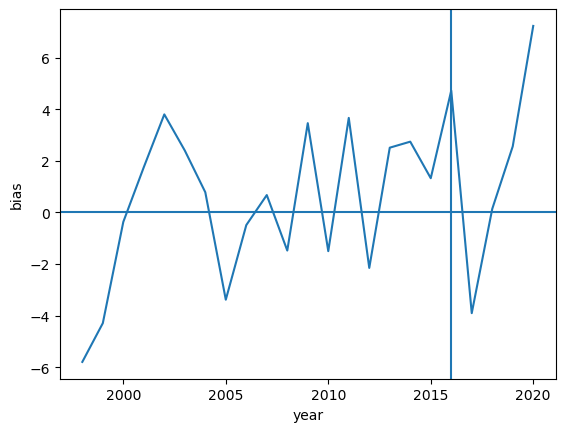

In [26]:
sns.lineplot(polls[polls['type_simple'] == 'Gov-G'].groupby('year')['bias'].mean())
plt.axhline(y = 0)
plt.axvline(x = 2016); # Governor races

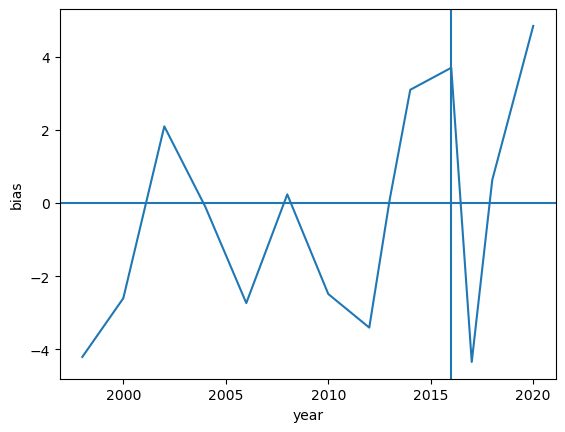

In [27]:
sns.lineplot(polls[polls['type_simple'] == 'Sen-G'].groupby('year')['bias'].mean())
plt.axhline(y = 0)
plt.axvline(x = 2016);

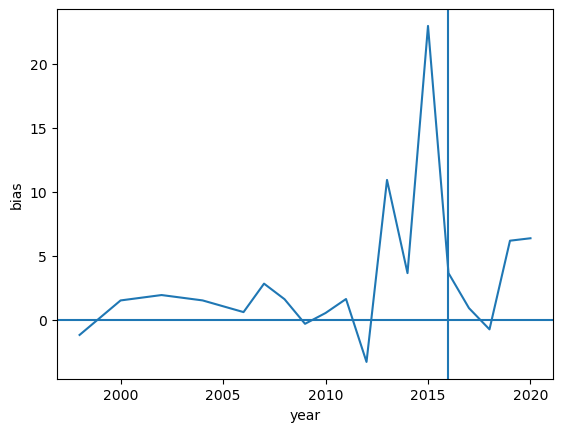

In [28]:
sns.lineplot(polls[polls['type_simple'] == 'House-G'].groupby('year')['bias'].mean())
plt.axhline(y = 0)
plt.axvline(x = 2016);

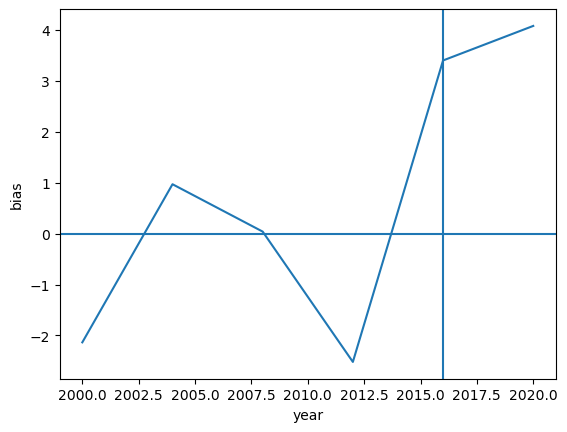

In [29]:
sns.lineplot(polls[polls['type_simple'] == 'Pres-G'].groupby('year')['bias'].mean())
plt.axhline(y = 0)
plt.axvline(x = 2016); 

In [30]:
polls[polls['type_simple'] == 'Pres-P'].groupby('year')['bias'].count()

year
2000    0
2004    0
2008    0
2012    0
2016    0
2020    0
Name: bias, dtype: int64

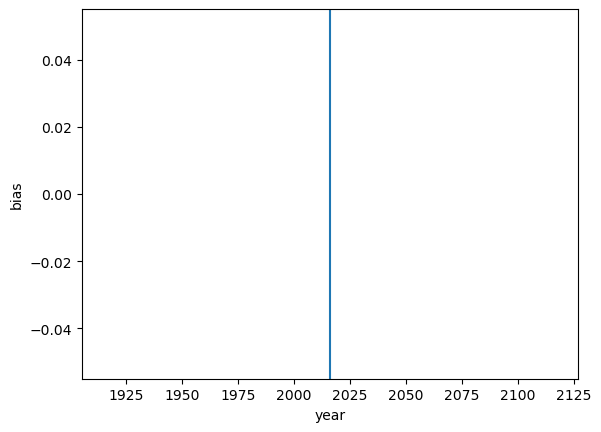

In [31]:
sns.lineplot(polls[polls['type_simple'] == 'Pres-P'].groupby('year')['bias'].mean())
#plt.axhline(y = 0)
plt.axvline(x = 2016); # All of this is missing for some reason

In [32]:
np.mean(polls['electiondate'].str.split('/').apply(lambda x: x[2]).astype(int) == polls['year']) # 0.04% of the years are different from election date

0.996844840386043

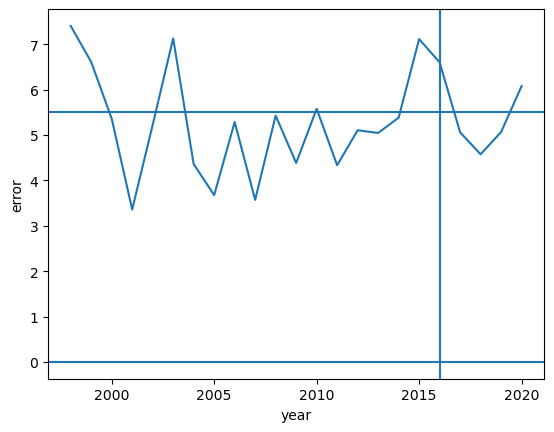

In [33]:
sns.lineplot(polls.groupby('year')['error'].mean())
plt.axhline(y = np.mean(polls['error']))
plt.axhline(y = 0)
plt.axvline(x = 2016);

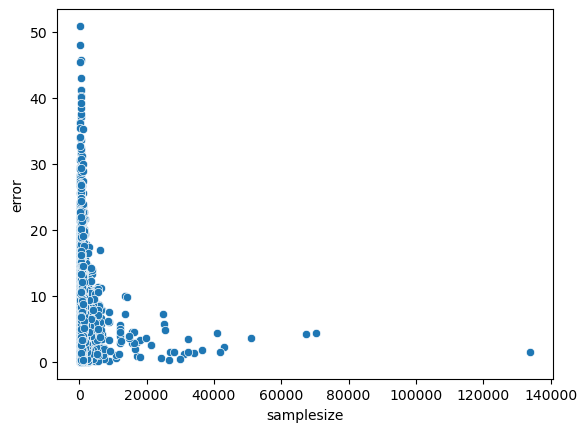

In [34]:
sns.scatterplot(x = polls['samplesize'], y = polls['error']);

In [35]:
polls['question_id'].value_counts().shape[0] == polls.shape[0]

True

In [36]:
polls['poll_id'].value_counts()

30618    7
32714    7
56778    6
34091    6
55068    6
        ..
63852    1
53208    1
63854    1
66294    1
51693    1
Name: poll_id, Length: 7504, dtype: int64

In [37]:
polls['location'].value_counts()

US      798
FL      626
NH      433
OH      427
PA      403
       ... 
MO-7      1
MS-2      1
NJ-1      1
WA-6      1
IL-3      1
Name: location, Length: 331, dtype: int64

In [38]:
polls['comment'].value_counts()>100 # this is useful just have to get somewhere with it 

among registered voters                                                                                                                         True
average of multiple versions or turnout models listed in poll                                                                                   True
for unspecified Democratic sponsor                                                                                                              True
for unspecified Republican sponsor                                                                                                              True
sample size unavailable; estimated at 600 as a default                                                                                          True
                                                                                                                                               ...  
for M. Michael Rounds                                                                                     

In [39]:
import re

In [40]:
polls['comment'][0]

'for New York Daily News | WABC-TV (New York)'

In [41]:
polls['comment'].str.contains('Times|Post|Herald|Tribune|News|NYT').sum()/polls.shape[0]

0.08556050482553823

In [42]:
polls['comment'][0]

'for New York Daily News | WABC-TV (New York)'

In [43]:
#import spacy

In [44]:
#nlp = spacy.load("en_core_web_trf")

In [45]:
#doc = nlp(polls['comment'][0])

In [46]:
# for ent in doc.ents:
#     print(ent.text, ent.label_)

In [47]:
# def org_flag(list):
#     for tup in list:
#         if tup[0] == 'ORG':
#             return 1
#     return 0

# def org_finder(text):
#     text = re.sub(r'(\d+)', '', text)
#     doc = nlp(text)

#     ents = [(ent.label_, ent.text) for ent in doc.ents]

#     return org_flag(ents)

In [48]:
#doc = nlp("Ron DeSantis is the governor of Florida")

In [49]:
#polls['org'] = polls['comment'].apply(lambda x: org_finder(x) if x is not np.nan else 0)

In [50]:
#polls['org'].value_counts()

In [51]:
#polls.groupby('org')['error'].mean()

In [52]:
# def person_flag(list):
#     for tup in list:
#         if tup[0] == 'PERSON':
#             return 1
#     return 0

# def person_finder(text):
#     text = re.sub(r'(\d+)', '', text)
#     doc = nlp(text)

#     ents = [(ent.label_, ent.text) for ent in doc.ents]

#     return person_flag(ents)

In [53]:
#polls['person'] = polls['comment'].apply(lambda x: person_finder(x) if x is not np.nan else 0)

In [54]:
#polls['person'].value_counts()

In [55]:
#polls.groupby('person')['error'].mean()

In [56]:
# text = 'for unspecified Democratic sponsor'

# person_finder(text)

In [57]:
#org_finder('for Reid | Cook Political Report; sample size unavailable; estimated at 600 as a default')

In [58]:
#nlp('Fox Orlando').ents[0].label_

In [59]:
#re.sub(r'(\d+)', '', 'for Fox35 Orlando 123 adsa 111')

In [60]:
#nlp.get_pipe_config('ner')

In [61]:
#nlp.pipe_names

In [62]:
#biglp = spacy.load('en_core_web_trf')

In [63]:
# def person_flag(list):
#     for tup in list:
#         if tup[0] == 'PERSON':
#             return 1
#     return 0

# def person_finder(text):
#     text = re.sub(r'(\d+)', '', text)
#     doc = biglp(text)

#     ents = [(ent.label_, ent.text) for ent in doc.ents]

#     return person_flag(ents)

In [64]:
#(polls['comment'].apply(lambda x: person_finder(x) if x is not np.nan else 0) == polls['person']).mean()

In [65]:
# def org_flag(list):
#     for tup in list:
#         if tup[0] == 'ORG':
#             return 1
#     return 0

# def org_finder(text):
#     text = re.sub(r'(\d+)', '', text)
#     doc = biglp(text)

#     ents = [(ent.label_, ent.text) for ent in doc.ents]

#     return org_flag(ents)

In [66]:
#(polls['comment'].apply(lambda x: org_finder(x) if x is not np.nan else 0) == polls['org']).mean()

In [67]:
polls['state'] = polls['location'].apply(lambda x: x.split('-')[0])

In [68]:
polls['location'].apply(lambda x: x.split('-')[0]).unique()

array(['NY', 'OH', 'NV', 'ID', 'US', 'AZ', 'IL', 'IA', 'NE', 'WI', 'MT',
       'GA', 'NC', 'CO', 'CT', 'MD', 'CA', 'FL', 'MN', 'NH', 'IN', 'HI',
       'NM', 'RI', 'KY', 'OK', 'ND', 'WA', 'MA', 'MI', 'PA', 'TX', 'SD',
       'UT', 'AL', 'KS', 'AR', 'MS', 'MO', 'SC', 'ME', 'OR', 'LA', 'VA',
       'VT', 'WV', 'NJ', 'TN', 'DE', 'AK', 'WY', 'M1', 'M2', 'DC', 'PR',
       'N2'], dtype=object)

In [69]:
pd.Series([i[:2] if len(i) > 2 else i for i in polls['location']]).unique()

array(['NY', 'OH', 'NV', 'ID', 'US', 'AZ', 'IL', 'IA', 'NE', 'WI', 'MT',
       'GA', 'NC', 'CO', 'CT', 'MD', 'CA', 'FL', 'MN', 'NH', 'IN', 'HI',
       'NM', 'RI', 'KY', 'OK', 'ND', 'WA', 'MA', 'MI', 'PA', 'TX', 'SD',
       'UT', 'AL', 'KS', 'AR', 'MS', 'MO', 'SC', 'ME', 'OR', 'LA', 'VA',
       'VT', 'WV', 'NJ', 'TN', 'DE', 'AK', 'WY', 'M1', 'M2', 'DC', 'PR',
       'N2'], dtype=object)

In [70]:
polls['state'].unique()

array(['NY', 'OH', 'NV', 'ID', 'US', 'AZ', 'IL', 'IA', 'NE', 'WI', 'MT',
       'GA', 'NC', 'CO', 'CT', 'MD', 'CA', 'FL', 'MN', 'NH', 'IN', 'HI',
       'NM', 'RI', 'KY', 'OK', 'ND', 'WA', 'MA', 'MI', 'PA', 'TX', 'SD',
       'UT', 'AL', 'KS', 'AR', 'MS', 'MO', 'SC', 'ME', 'OR', 'LA', 'VA',
       'VT', 'WV', 'NJ', 'TN', 'DE', 'AK', 'WY', 'M1', 'M2', 'DC', 'PR',
       'N2'], dtype=object)

In [71]:
polls[polls['location'] == 'ME']['type_simple'].value_counts()

Pres-G    30
Sen-G     29
Gov-G     25
Pres-P     5
Name: type_simple, dtype: int64

In [72]:
polls[polls['state'] == 'N2']

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,...,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,advancedplusminus,comment,state
3917,74501,140195,8703,2008,2008_Pres-G_N2,N2,Pres-G,Pres-G,ALG Research,14,...,11/4/2008,49.97,48.75,1.21,5.21,-5.21,0.0,-2.394493,for Jim Esch,N2
6347,30388,36463,8708,2012,2012_Pres-G_N2,N2,Pres-G,Pres-G,Wiese Research Associates,382,...,11/6/2012,45.70,52.85,-7.16,2.16,2.16,1.0,-5.322739,NaN,N2
8181,47788,74808,8713,2016,2016_Pres-G_N2,N2,Pres-G,Pres-G,"North Star Opinion Research/Ayres, McHenry & A...",233,...,11/8/2016,44.92,47.16,-2.24,1.76,-1.76,1.0,-5.622639,for unspecified Republican sponsor; among regi...,N2
10631,72410,135867,8718,2020,2020_Pres-G_N2,N2,Pres-G,Pres-G,Emerson College,88,...,11/3/2020,51.95,45.45,6.50,3.90,-3.90,1.0,0.432107,NaN,N2
10699,72757,136537,8718,2020,2020_Pres-G_N2,N2,Pres-G,Pres-G,Change Research,48,...,11/3/2020,51.95,45.45,6.50,3.50,-3.50,1.0,-0.450888,NaN,N2
10736,72754,136533,8718,2020,2020_Pres-G_N2,N2,Pres-G,Pres-G,"University of Nevada, Las Vegas Lee Business S...",609,...,11/3/2020,51.95,45.45,6.50,0.60,-0.60,1.0,-4.877900,NaN,N2


In [73]:
polls[polls['state'] == 'M1']

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,...,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,advancedplusminus,comment,state
2006,74499,140193,8700,2004,2004_Pres-G_M1,M1,Pres-G,Pres-G,SurveyUSA,325,...,11/2/2004,55.07,43.14,11.94,8.94,-8.94,1.0,1.396082,NaN,M1
6606,30751,37089,8710,2012,2012_Pres-G_M1,M1,Pres-G,Pres-G,Critical Insights,64,...,11/6/2012,59.57,38.18,21.39,15.39,-15.39,1.0,10.756007,NaN,M1
6781,30803,37165,8710,2012,2012_Pres-G_M1,M1,Pres-G,Pres-G,Maine People's Resource Center,180,...,11/6/2012,59.57,38.18,21.39,3.69,-3.69,1.0,-2.231295,NaN,M1
6782,30622,36824,8710,2012,2012_Pres-G_M1,M1,Pres-G,Pres-G,Public Policy Polling,263,...,11/6/2012,59.57,38.18,21.39,1.39,-1.39,1.0,-4.390005,NaN,M1
8182,47773,74796,8715,2016,2016_Pres-G_M1,M1,Pres-G,Pres-G,University of New Hampshire,357,...,11/8/2016,53.96,39.15,14.81,5.19,5.19,1.0,-0.544549,for Portland Press Herald | Maine Sunday Telegram,M1
8230,47998,75064,8715,2016,2016_Pres-G_M1,M1,Pres-G,Pres-G,Maine People's Resource Center,180,...,11/8/2016,53.96,39.15,14.81,2.06,-2.06,1.0,-3.923375,average of multiple versions or turnout models...,M1
8451,47935,74991,8715,2016,2016_Pres-G_M1,M1,Pres-G,Pres-G,Emerson College,88,...,11/8/2016,53.96,39.15,14.81,8.51,-8.51,1.0,4.031939,NaN,M1
10149,72080,135138,8422,2020,2020_Pres-G_M1,M1,Pres-G,Pres-G,Colby College,593,...,11/3/2020,60.11,37.02,23.09,1.09,-1.09,1.0,-3.476491,NaN,M1
10268,72178,135386,8422,2020,2020_Pres-G_M1,M1,Pres-G,Pres-G,SurveyUSA,325,...,11/3/2020,60.11,37.02,23.09,4.09,-4.09,1.0,0.704271,for FairVote,M1
10629,72512,136076,8422,2020,2020_Pres-G_M1,M1,Pres-G,Pres-G,Emerson College,88,...,11/3/2020,60.11,37.02,23.09,4.09,-4.09,1.0,0.465248,NaN,M1


In [74]:
polls[polls['state'] == 'M2'].loc[10630]

poll_id                             72513
question_id                        136077
race_id                              8423
year                                 2020
race                       2020_Pres-G_M2
location                               M2
type_simple                        Pres-G
type_detail                        Pres-G
pollster                  Emerson College
pollster_rating_id                     88
methodology               IVR/Online/Text
partisan                              NaN
polldate                       10/30/2020
samplesize                          301.0
cand1_name            Joseph R. Biden Jr.
cand1_id                            13256
cand1_party                           DEM
cand1_pct                            49.8
cand2_name                   Donald Trump
cand2_id                            13254
cand2_party                           REP
cand2_pct                            46.8
cand3_pct                             NaN
margin_poll                       

In [75]:
polls[(polls['pollster_rating_id'] == 88) & (polls['year'] == 2020) & (polls['type_simple'] == 'Pres-G')][['location', 'methodology', 'polldate']]

,location,methodology,polldate
9794,NC,IVR/Online/Text,10/14/2020
9937,GA,IVR/Online,10/18/2020
10039,IA,IVR/Online/Text,10/20/2020
10271,US,IVR/Online,10/26/2020
10534,AZ,IVR/Online/Text,10/30/2020
10540,FL,IVR/Online/Text,10/30/2020
10547,GA,IVR/Online/Text,10/30/2020
10550,IA,IVR/Online/Text,10/30/2020
10555,ME,IVR/Online/Text,10/30/2020
10556,MI,IVR/Online/Text,10/30/2020


In [76]:
#biglp('sample size unavailable')

In [77]:
polls.columns

Index(['poll_id', 'question_id', 'race_id', 'year', 'race', 'location',
       'type_simple', 'type_detail', 'pollster', 'pollster_rating_id',
       'methodology', 'partisan', 'polldate', 'samplesize', 'cand1_name',
       'cand1_id', 'cand1_party', 'cand1_pct', 'cand2_name', 'cand2_id',
       'cand2_party', 'cand2_pct', 'cand3_pct', 'margin_poll', 'electiondate',
       'cand1_actual', 'cand2_actual', 'margin_actual', 'error', 'bias',
       'rightcall', 'advancedplusminus', 'comment', 'state'],
      dtype='object')

In [78]:
# def state_agg(state_code):
#     map = {
#         'N2' : 'NE',
#         'M1' : 'ME',
#         'M2' : 'ME'
#     }

#     if state_code in ['N2', 'M1', 'M2']:
#         return map[state_code]
#     else:
#         return state_code

In [79]:
polls['state'] = polls['location'].apply(lambda x: x.split('-')[0])
polls['state_agg'] = polls['state'].apply(state_agg)

In [80]:
polls['state_agg'].unique()

array(['NY', 'OH', 'NV', 'ID', 'US', 'AZ', 'IL', 'IA', 'NE', 'WI', 'MT',
       'GA', 'NC', 'CO', 'CT', 'MD', 'CA', 'FL', 'MN', 'NH', 'IN', 'HI',
       'NM', 'RI', 'KY', 'OK', 'ND', 'WA', 'MA', 'MI', 'PA', 'TX', 'SD',
       'UT', 'AL', 'KS', 'AR', 'MS', 'MO', 'SC', 'ME', 'OR', 'LA', 'VA',
       'VT', 'WV', 'NJ', 'TN', 'DE', 'AK', 'WY', 'DC', 'PR'], dtype=object)

In [81]:
len(polls['pollster_rating_id'].unique())

493

In [82]:
df.head()

,Rank,Pollster,Pollster Rating ID,Polls Analyzed,AAPOR/Roper,Banned by 538,Predictive Plus-Minus,538 Grade,Mean-Reverted Bias,Races Called Correctly,...,Simple Average Error,Simple Expected Error,Simple Plus-Minus,Advanced Plus-Minus,Mean-Reverted Advanced Plus-Minus,# of Polls for Bias Analysis,Bias,House Effect,Average Distance from Polling Average (ADPA),Herding Penalty
0,1,The New York Times/Siena College,448,95,yes,no,-1.192860,A+,1.006012,0.747368,...,4.043250,5.364792,-1.318429,-1.625523,-1.318372,94,1.243260,0.700506,3.575558,0.261188
1,2,Selzer & Co.,304,53,yes,no,-1.175911,A+,0.161120,0.811321,...,4.916848,5.959235,-1.039274,-1.622671,-1.000844,35,0.297645,-0.343495,5.288403,0.000000
2,3,Research & Polling Inc.,280,44,no,no,-0.965392,A+,-0.582568,0.886364,...,4.177286,5.548050,-1.367651,-1.938115,-1.183301,43,-0.956078,0.632896,4.642076,0.286276
3,4,SurveyUSA,325,856,no,no,-0.917320,A+,0.003251,0.891355,...,4.681671,5.642531,-0.957747,-1.094410,-1.043528,697,0.003447,-0.526230,4.969035,0.126963
4,5,Marquette University Law School,195,15,yes,no,-0.908215,A/B,0.237527,0.800000,...,2.846556,5.938505,-3.088836,-3.191347,-1.208475,11,0.751227,-0.199840,4.201278,0.257600


In [83]:
missing = []
for id in polls['pollster_rating_id'].unique():
    if int(id) not in list(df['Pollster Rating ID']):
        missing.append(id)

In [84]:
missing_grades = []
for id in missing:
    for row in polls[polls['pollster_rating_id'] == id].values:
        if row[8] not in missing_grades:
            missing_grades.append(row[8])

In [85]:
missing_grades

['University of Maryland',
 'Brigham Young University',
 'Research America Inc.',
 'Insights West',
 'Sacred Heart University',
 'Hofstra University']

In [86]:
for pollster in missing_grades:
    print(pollster, polls[polls['pollster'] == pollster].shape[0])

University of Maryland 1
Brigham Young University 4
Research America Inc. 3
Insights West 9
Sacred Heart University 2
Hofstra University 2


In [87]:
from spacy import load as load_spacy

nlp = load_spacy('en_core_web_trf')

In [88]:
def imputed_checker(text):
    if text is not np.nan:
        return 1 if 'sample size unavailable' in text else 0
    return 0

In [89]:
imputed_samplesize = polls['comment'].apply(imputed_checker)

In [90]:
polls[imputed_samplesize == 1]['samplesize']

8        600.0
124      600.0
165      600.0
269      600.0
277      600.0
         ...  
7206     600.0
7207     600.0
7308     788.5
8221     600.0
10241    600.0
Name: samplesize, Length: 214, dtype: float64

In [91]:
polls['comment'][7308]

'sample size unavailable; estimated at 600 as a default; average of multiple versions or turnout models listed in poll'

In [92]:
sample_600 = polls['samplesize'].apply(lambda x: 1 if x == 600 else 0)

In [93]:
actual = imputed_samplesize * sample_600

In [94]:
polls[actual == 1]['samplesize'].describe()

count    199.0
mean     600.0
std        0.0
min      600.0
25%      600.0
50%      600.0
75%      600.0
max      600.0
Name: samplesize, dtype: float64

In [95]:
polls['imputed_600'] = actual

In [96]:
polls.groupby('imputed_600')['samplesize'].describe()

,count,mean,std,min,25%,50%,75%,max
imputed_600,,,,,,,,
0,10577.0,922.818616,2279.976071,86.0,500.0,630.0,900.0,134000.0
1,199.0,600.000000,0.000000,600.0,600.0,600.0,600.0,600.0


In [97]:
from feature_extraction import imputed_600 as imp6

In [98]:
np.mean(polls['imputed_600'] == imp6(polls))

1.0

In [99]:
polls['anon'] = polls['comment'].str.contains('unspecified').apply(lambda x: 1 if x == True else 0)

In [100]:
polls['anon'].value_counts()

0    10287
1      489
Name: anon, dtype: int64

In [101]:
polls['registered_voters'] = polls['comment'].str.contains(r"registered voters|'voters'").apply(lambda x: 1 if x == True else 0) # we are counting 'voters' as registered voters and not likely voters

In [102]:
polls['registered_voters'].value_counts()

0    10253
1      523
Name: registered_voters, dtype: int64

In [103]:
polls['averaged'] = polls['comment'].str.contains('average').apply(lambda x: 1 if x == True else 0)

In [104]:
polls.columns

Index(['poll_id', 'question_id', 'race_id', 'year', 'race', 'location',
       'type_simple', 'type_detail', 'pollster', 'pollster_rating_id',
       'methodology', 'partisan', 'polldate', 'samplesize', 'cand1_name',
       'cand1_id', 'cand1_party', 'cand1_pct', 'cand2_name', 'cand2_id',
       'cand2_party', 'cand2_pct', 'cand3_pct', 'margin_poll', 'electiondate',
       'cand1_actual', 'cand2_actual', 'margin_actual', 'error', 'bias',
       'rightcall', 'advancedplusminus', 'comment', 'state', 'state_agg',
       'imputed_600', 'anon', 'registered_voters', 'averaged'],
      dtype='object')

In [105]:
from feature_extraction import org_finder, person_finder

In [106]:
#polls['org'] = polls['comment'].apply(lambda x: org_finder(x) if x is not np.nan else 0)
#polls['person'] = polls['comment'].apply(lambda x: person_finder(x) if x is not np.nan else 0)

In [107]:
# polls.to_csv('../data/raw-polls-updated.csv', index = False)

In [108]:
polls = polls[[col for col in polls.columns if col != 'rightcall'] + ['rightcall']]

In [109]:
polls.columns

Index(['poll_id', 'question_id', 'race_id', 'year', 'race', 'location',
       'type_simple', 'type_detail', 'pollster', 'pollster_rating_id',
       'methodology', 'partisan', 'polldate', 'samplesize', 'cand1_name',
       'cand1_id', 'cand1_party', 'cand1_pct', 'cand2_name', 'cand2_id',
       'cand2_party', 'cand2_pct', 'cand3_pct', 'margin_poll', 'electiondate',
       'cand1_actual', 'cand2_actual', 'margin_actual', 'error', 'bias',
       'advancedplusminus', 'comment', 'state', 'state_agg', 'imputed_600',
       'anon', 'registered_voters', 'averaged', 'rightcall'],
      dtype='object')

In [119]:
polls['pdate'] = pd.to_datetime(polls['polldate'], format = r'%m/%d/%Y')
polls['edate'] = pd.to_datetime(polls['electiondate'], format = r'%m/%d/%Y')

In [279]:
polls['days_to_election'] = polls['edate'] - polls['pdate']

In [280]:
error_vs_days = polls.groupby('days_to_election')['error'].mean()
polls_vs_days = polls.groupby('days_to_election')['error'].count()

In [294]:
error_vs_days.index.days

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20, 21],
           dtype='int64', name='days_to_election')

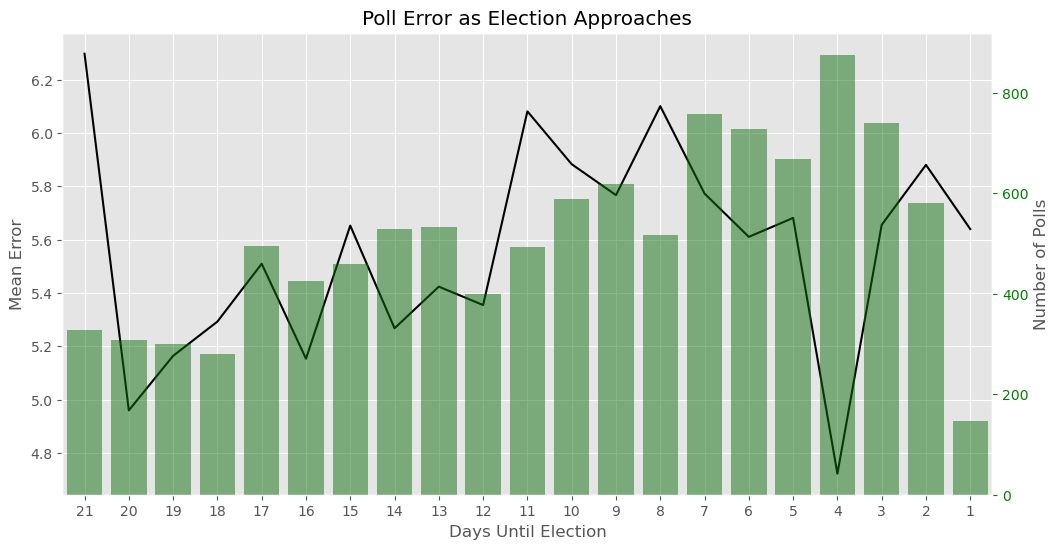

In [343]:
plt.style.use('ggplot')
_, ax = plt.subplots(figsize = (12,6))
sns.lineplot(x =  error_vs_days.index.days - 1, y = error_vs_days.values, ax = ax, color = 'black')
# ax.set_xticks(ticks = range(-21, 0), labels = range(21, 0, -1))
ax2 = ax.twinx()
sns.barplot(x = -1 * polls_vs_days.index.days, y = polls_vs_days.values, color = 'green', ax  = ax2, alpha = 0.5)
ax2.grid(False);
ax2.set_xticks(ticks = ax.get_xticks(), labels = range(21, 0, -1)); # ticks = range(-21, 0), 

plt.title('Poll Error as Election Approaches')
ax.set_xlabel('Days Until Election')
ax.set_ylabel('Mean Error')
ax2.set_ylabel('Number of Polls')

ax2.tick_params(colors = 'green', which = 'major');

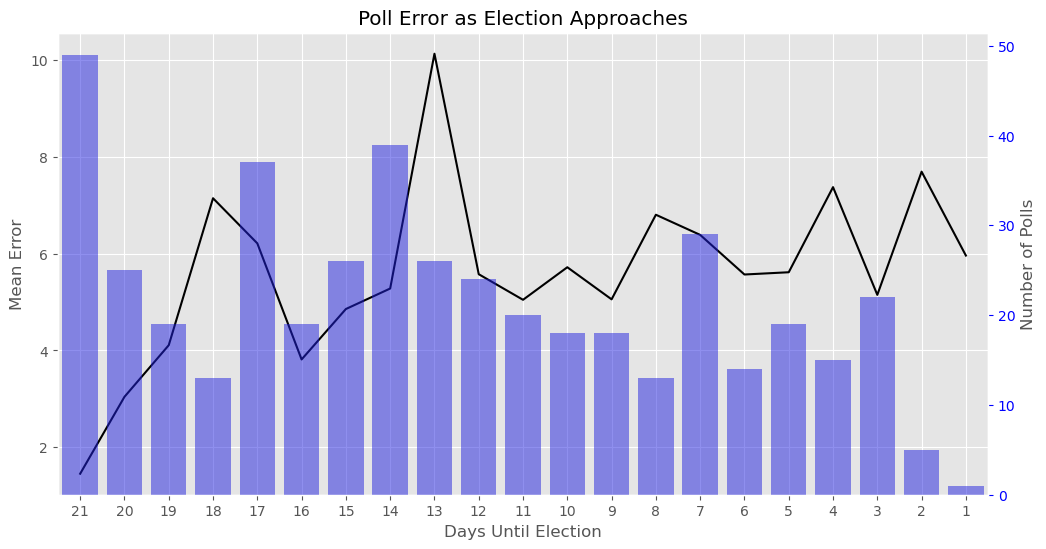

In [350]:
plt.style.use('ggplot')
dems_e_by_days = polls[polls['partisan'] == 'D'].groupby('days_to_election')['error'].mean()
dems_p_by_days = polls[polls['partisan'] == 'D'].groupby('days_to_election')['error'].count()
_, ax = plt.subplots(figsize = (12,6))
sns.lineplot(x =  dems_e_by_days.index.days - 1, y = dems_e_by_days.values, ax = ax, color = 'black')
# ax.set_xticks(ticks = range(-21, 0), labels = range(21, 0, -1))
ax2 = ax.twinx()
sns.barplot(x = -1 * dems_p_by_days.index.days, y = dems_p_by_days.values, color = 'blue', ax  = ax2, alpha = 0.5)
ax2.grid(False);
ax2.set_xticks(ticks = ax.get_xticks(), labels = range(21, 0, -1)); # ticks = range(-21, 0), 

plt.title('Poll Error as Election Approaches')
ax.set_xlabel('Days Until Election')
ax.set_ylabel('Mean Error')
ax2.set_ylabel('Number of Polls')

ax2.tick_params(colors = 'blue', which = 'major');

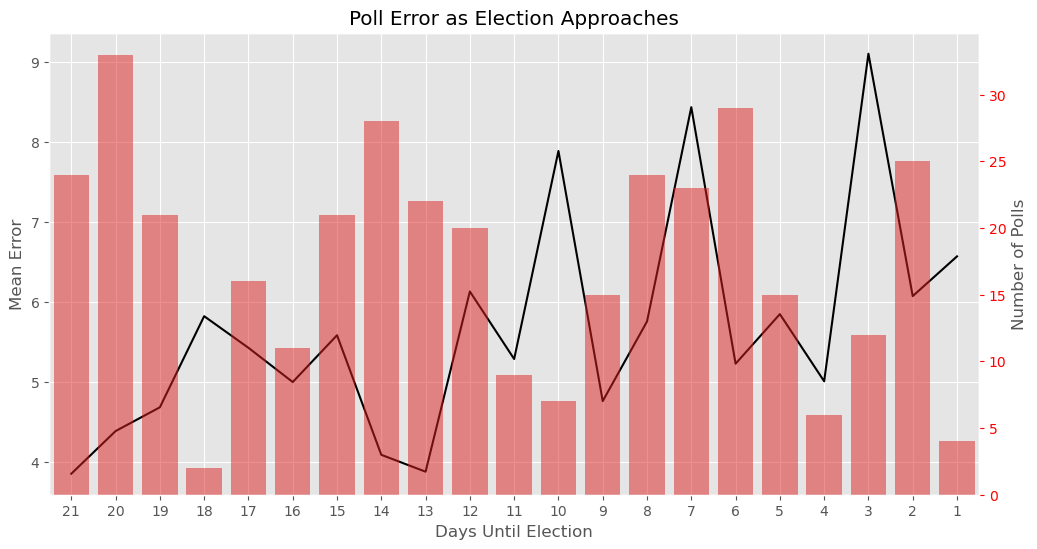

In [353]:
plt.style.use('ggplot')
reps_e_by_days = polls[polls['partisan'] == 'R'].groupby('days_to_election')['error'].mean()
reps_p_by_days = polls[polls['partisan'] == 'R'].groupby('days_to_election')['error'].count()
_, ax = plt.subplots(figsize = (12,6))
sns.lineplot(x =  reps_e_by_days.index.days - 1, y = reps_e_by_days.values, ax = ax, color = 'black')
# ax.set_xticks(ticks = range(-21, 0), labels = range(21, 0, -1))
ax2 = ax.twinx()
sns.barplot(x = -1 * reps_p_by_days.index.days, y = reps_p_by_days.values, color = 'red', ax  = ax2, alpha = 0.5)
ax2.grid(False);
ax2.set_xticks(ticks = ax.get_xticks(), labels = range(21, 0, -1)); # ticks = range(-21, 0), 

plt.title('Poll Error as Election Approaches')
ax.set_xlabel('Days Until Election')
ax.set_ylabel('Mean Error')
ax2.set_ylabel('Number of Polls')

ax2.tick_params(colors = 'red', which = 'major');

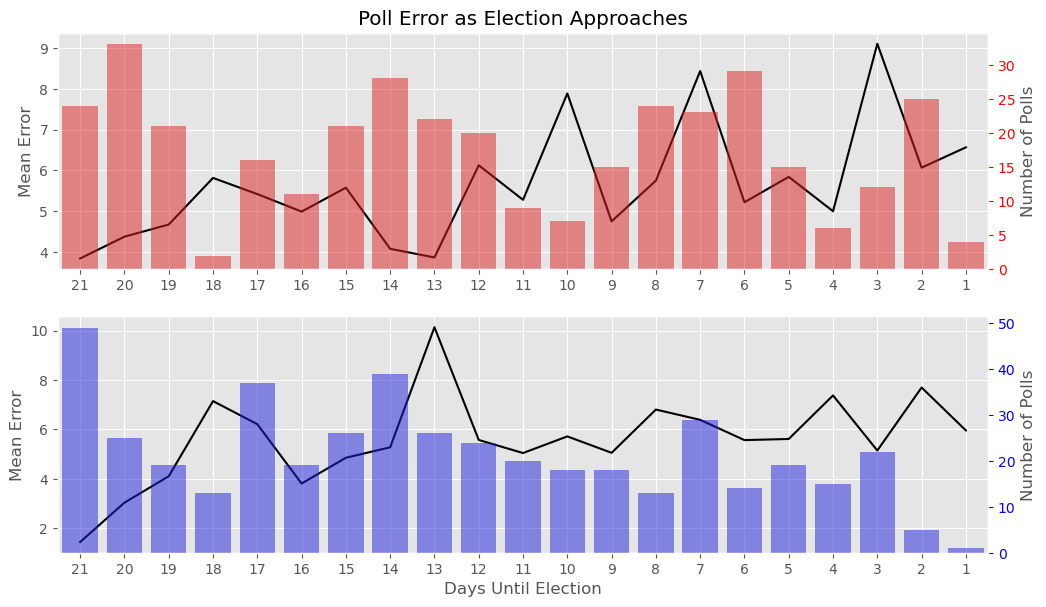

In [365]:
_, ax = plt.subplots(nrows = 2, figsize = (12,9*.75))

sns.lineplot(x =  reps_e_by_days.index.days - 1, y = reps_e_by_days.values, ax = ax[0], color = 'black')
# ax.set_xticks(ticks = range(-21, 0), labels = range(21, 0, -1))
ax02 = ax[0].twinx()
sns.barplot(x = -1 * reps_p_by_days.index.days, y = reps_p_by_days.values, color = 'red', ax  = ax02, alpha = 0.5)
ax02.grid(False);
ax02.set_xticks(ticks = ax[0].get_xticks(), labels = range(21, 0, -1)); # ticks = range(-21, 0), 

plt.title('Poll Error as Election Approaches')
ax[0].set_xlabel('')
ax[0].set_ylabel('Mean Error')
ax02.set_ylabel('Number of Polls')

ax02.tick_params(colors = 'red', which = 'major')

sns.lineplot(x =  dems_e_by_days.index.days - 1, y = dems_e_by_days.values, ax = ax[1], color = 'black')
# ax.set_xticks(ticks = range(-21, 0), labels = range(21, 0, -1))
ax12 = ax[1].twinx()
sns.barplot(x = -1 * dems_p_by_days.index.days, y = dems_p_by_days.values, color = 'blue', ax  = ax12, alpha = 0.5)
ax12.grid(False);
ax12.set_xticks(ticks = ax[1].get_xticks(), labels = range(21, 0, -1)); # ticks = range(-21, 0), 

#plt.title('Poll Error as Election Approaches')
ax[1].set_xlabel('Days Until Election')
ax[1].set_ylabel('Mean Error')
ax12.set_ylabel('Number of Polls')

ax12.tick_params(colors = 'blue', which = 'major');

In [263]:
polls[polls['rightcall'] == 0.5]['margin_poll'].mean()

0.0014999997500000006

In [258]:
polls['rightcall'].value_counts()

1.0    8444
0.0    1932
0.5     400
Name: rightcall, dtype: int64

In [368]:
phone_online = polls.groupby('year')[['error', 'bias']].count()

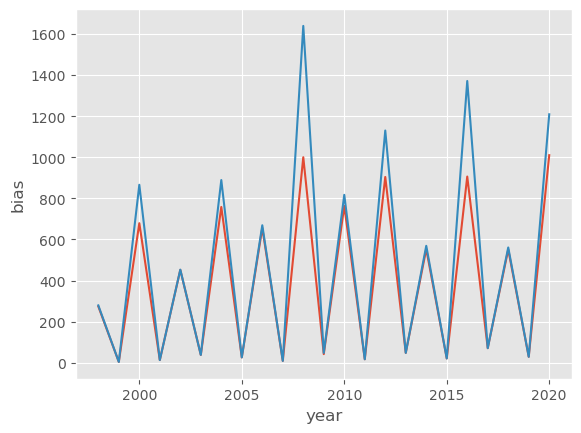

In [370]:
sns.lineplot(phone_online['bias'])
sns.lineplot(phone_online['error']);

In [371]:
phone = polls[polls['Live Phone'] == 1].groupby('year')['bias'].count()
online = polls[polls['Online'] == 1].groupby('year')['bias'].count()

sns.lineplot(online)
sns.lineplot(phone);

,error,bias
year,,
1998,279,274
1999,4,4
2000,866,679
2001,13,13
2002,453,452
2003,38,38
2004,889,758
2005,26,26
2006,669,656
